use python3

# Preamble

In [2]:
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import xarray as xr
import pandas as pd
import numpy as np

In [3]:
from box_coordinates_and_paths import choose_region

# Data

In [4]:
datapath = "/work/mh0731/m300868/00_DATA/Paper_Data_Revised/"

seasons_df = pd.read_csv(datapath+'top_of_ABL_combined_review.csv', index_col=0)
seasons_df

,2020-MAM,2020-JJA,2020-SON,2021-DJF,2021-MAM,2021-JJA,2021-SON,2022-DJF
western_pacific,8,8,8,7,8,8,8,7
central_pacific,8,8,8,8,8,8,8,8
eastern_pacific,11,11,13,11,11,12,12,11
indian_ocean,7,7,8,9,8,8,7,12
atlantic,9,10,13,11,9,7,14,9


In [5]:
datapath_2 = "/work/mh0731/m300868/00_DATA/Paper_Data/"
mean_cell_height = xr.open_dataset(datapath_2+'02_fig_mean_cell_height_in_meter.nc').cell_height

# Statistics

In [14]:
height_in_meters = mean_cell_height.values
seasons_df_in_meters = seasons_df.applymap(lambda level: height_in_meters[level])
seasons_df_in_meters

,2020-MAM,2020-JJA,2020-SON,2021-DJF,2021-MAM,2021-JJA,2021-SON,2022-DJF
western_pacific,909.808899,909.808899,909.808899,737.147095,909.808899,909.808899,909.808899,737.147095
central_pacific,909.808899,909.808899,909.808899,909.808899,909.808899,909.808899,909.808899,909.808899
eastern_pacific,1517.921387,1517.921387,1995.859009,1517.921387,1517.921387,1749.766968,1749.766968,1517.921387
indian_ocean,737.147095,737.147095,909.808899,1097.701538,909.808899,909.808899,737.147095,1749.766968
atlantic,1097.701538,1300.494141,1995.859009,1517.921387,1097.701538,737.147095,2256.058350,1097.701538


In [15]:
overall_mean = seasons_df_in_meters.mean().mean()
overall_std = seasons_df_in_meters.stack().std()

print(f"Overall Mean: {overall_mean:.2f} meters")
print(f"Overall Standard Deviation: {overall_std:.2f} meters")

Overall Mean: 1154.64 meters
Overall Standard Deviation: 410.81 meters


In [20]:
total_values = seasons_df_in_meters.size
below_1000m_count = (seasons_df_in_meters < overall_mean).sum().sum()
below_1000m_percentage = (below_1000m_count / total_values) * 100

print(f"Percentage of values below {overall_mean} meters: {below_1000m_percentage:.2f}%")

Percentage of values below 1154.6385498046875 meters: 67.50%


# Plotting

In [6]:
SIZE = 25
plt.rcParams['axes.labelsize']  = SIZE
plt.rcParams['legend.fontsize'] = SIZE
plt.rcParams['xtick.labelsize'] = SIZE
plt.rcParams['ytick.labelsize'] = SIZE
plt.rcParams['font.size']       = SIZE

/tmp/ipykernel_2122637/4196286717.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21",''])


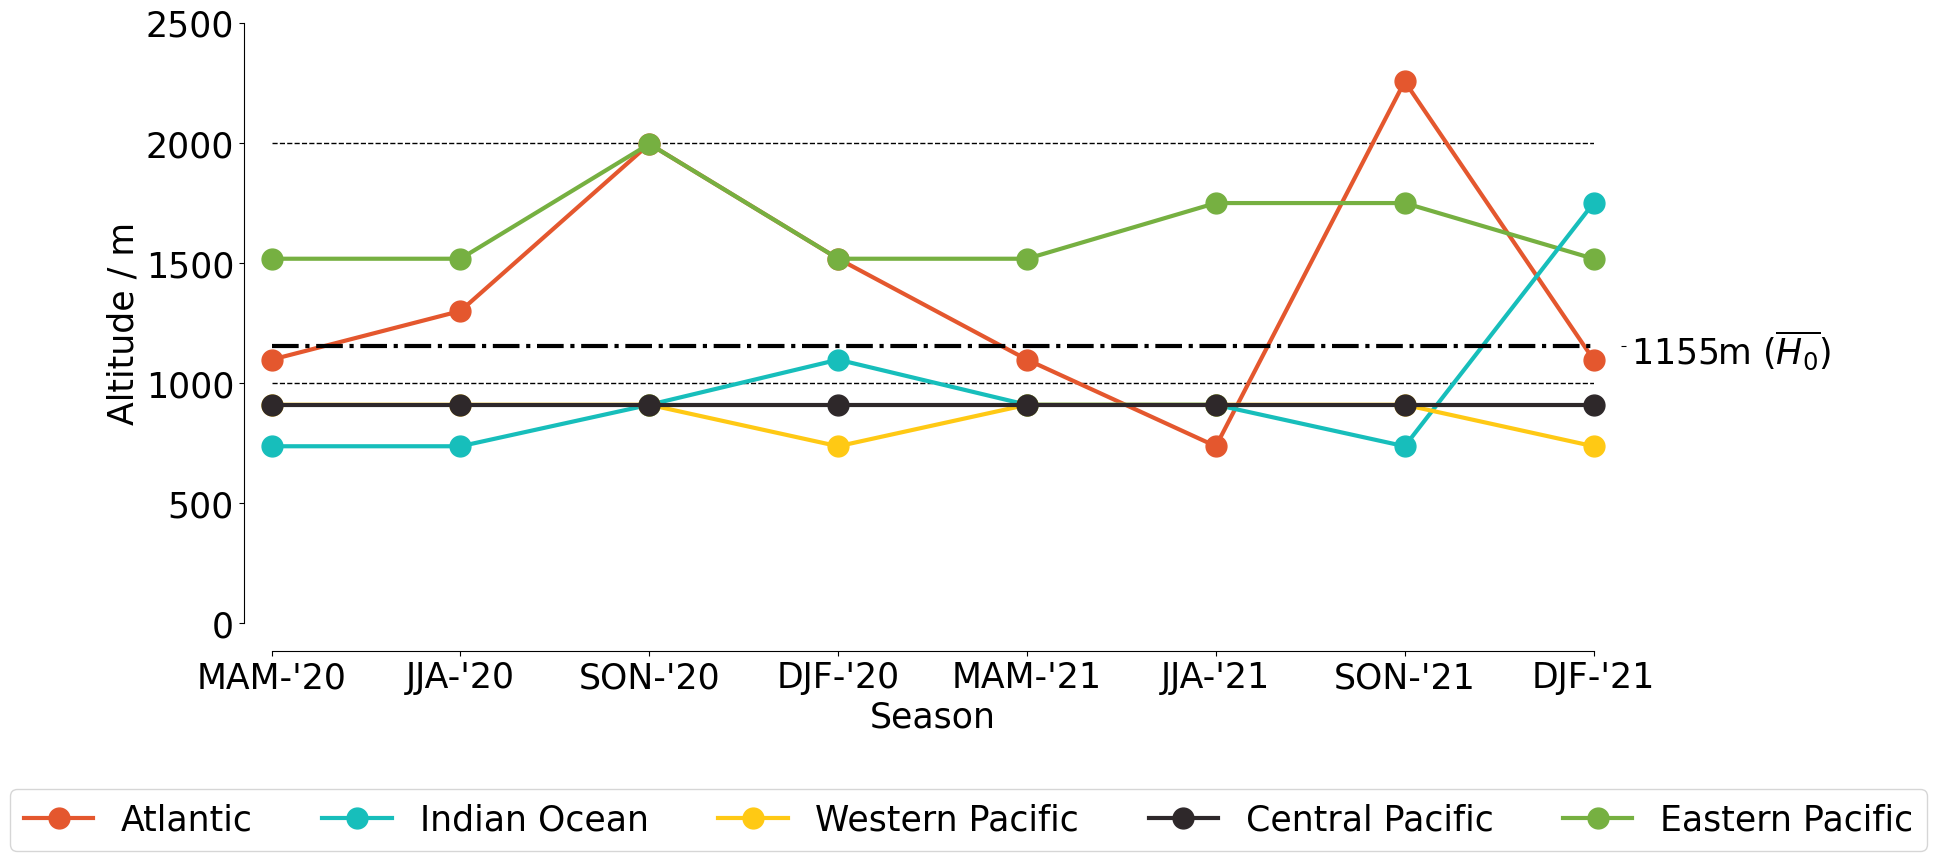

In [17]:
fig = plt.figure(figsize=(18,8), facecolor='w', edgecolor='k')
G = gridspec.GridSpec(1,1)

ax1 = plt.subplot(G[0,0])
ax22 = ax1.twinx()

YLIM_TOP = 2500

ax1.axhline(1000, color='black', lw=1, ls='dashed')
ax1.axhline(2000, color='black', lw=1, ls='dashed')
ax1.axhline(3000, color='black', lw=1, ls='dashed')

ax1.plot(mean_cell_height[seasons_df.loc['atlantic'].values], marker='o', ms=15, lw=3, color='#E4572E', label='Atlantic', clip_on=False)
ax1.plot(mean_cell_height[seasons_df.loc['indian_ocean'].values], marker='o', ms=15, lw=3, color='#17BEBB', label='Indian Ocean', zorder=10, clip_on=False)
ax1.plot(mean_cell_height[seasons_df.loc['western_pacific'].values], marker='o', ms=15, lw=3, color='#FFC914', label='Western Pacific', clip_on=False, zorder=12)
ax1.plot(mean_cell_height[seasons_df.loc['central_pacific'].values], marker='o', ms=15, lw=3, color='#2E282A', label='Central Pacific', clip_on=False, zorder=14)
ax1.plot(mean_cell_height[seasons_df.loc['eastern_pacific'].values], marker='o', ms=15, lw=3, color='#76B041', label='Eastern Pacific', clip_on=False)

ax1.spines[['top','right']].set_visible(False)
ax1.spines[['bottom', 'left']].set_position(('outward',20))
ax1.set_xlim(0,7)
ax1.set_xticklabels(["MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21",''])
ax1.set_ylim(0,YLIM_TOP)
ax1.set_yticks([0,500,1000,1500,2000,2500])

ax1.set_xlabel('Season')
ax1.set_ylabel('Altitude / m')
    
ax22.set_ylim(0,YLIM_TOP)
ax22.spines[['left', 'bottom','top','right']].set_visible(False)
ax22.spines[['right']].set_position(('outward',20))
ax22.tick_params(axis='y', colors='black')

ax22.axhline(overall_mean, color='black', lw=3, ls='dashdot')
ax22.set_yticks([overall_mean])
ax22.set_yticklabels([f"{overall_mean:.0f}m"+r" ($\overline{H_0}$)"])

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=False, ncol=8)

plt.tight_layout()

filename = f'fig_03_revised.pdf'
filepath = 'figs_review/'
plt.savefig(filepath + filename, facecolor='white', bbox_inches='tight', dpi=400)

plt.show()